# Business Objective: Derive factors of Default
The company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [241]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [242]:
#Reading data from csv file using pandas
loans_data = pd.read_csv("loan.csv")

In [243]:
loans_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [244]:
# check shape & datatype of loans data
print(loans_data.shape)

# Observations:
# Shape of data is 39717 rows and 111 columns

print(loans_data.info())
print(loans_data.dtypes)

(39717, 111)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None
id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object


#### check for rows have all missing values

In [245]:
loans_data.isnull().all(axis=1).sum()

# Observations: There are no empty rows in the dataset.

0

####  check for columns have all missing values

In [246]:
loans_data.isnull().all(axis=0).sum()

# Observations: There are 54 columns have all missing values.

54

## Data Cleaning:

#### Lets find list of columns have all null values

In [247]:
loans_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

#### Drop null columns

In [248]:
loans_data.dropna(axis = 1, how = 'all', inplace = True)
loans_data.head()

# Observations: 
# All 54 null columns are removed and remaining columns count is 57

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


### Most of variables are not associated in identifying the default as they come in picture when the loan is approved. But we are focused if we want to approve loan in starting or not. We can categorize all remaining variables in 3 category

- Customer Demographics variables
- Loan and Investor variables
- Customer Behaviour variables

### To meet business objective we will only consider the Customer Demographic and Loan variables and we will ignore the Customer behaviour variables as these will not be known during the time of application.

### List of variables we can delete from Customer behaviour (most of them are post approval data)
- delinq_2yrs
- revol_bal
- out_prncp
- total_pymnt
- total_rec_prncp
- total_rec_int
- total_rec_late_fee
- recoveries
- collection_recovery_fee
- last_pymnt_d
- last_pymnt_amnt
- next_pymnt_d
- chargeoff_within_12_mths
- mths_since_last_delinq
- mths_since_last_record

In [249]:
loans_data.drop(["delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee", "last_pymnt_d", "last_pymnt_amnt", "next_pymnt_d" , "chargeoff_within_12_mths", "mths_since_last_delinq", "mths_since_last_record"], axis = 1, inplace = True)
loans_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,out_prncp_inv,total_pymnt_inv,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,0.00,5833.84,May-16,0.0,1,INDIVIDUAL,0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,0.00,1008.71,Sep-13,0.0,1,INDIVIDUAL,0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,0.00,3005.67,May-16,0.0,1,INDIVIDUAL,0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,0.00,12231.89,Apr-16,0.0,1,INDIVIDUAL,0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,524.06,3513.33,May-16,0.0,1,INDIVIDUAL,0,0,0.0,0.0


### List of variables we can delete from customer demographics data. All these columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them.
- id
- member_id
- url
- title
- emp_title
- zip_code
- last_credit_pull_d
- addr_state
- desc -- **(has (text data) which we cannot do anythhing about for now. So removing the column)**
- out_prncp_inv -- **(useful for investors but not contributing to the loan defaulting analysis. So removing them)**
- total_pymnt_inv -- **(useful for investors but not contributing to the loan defaulting analysis. So removing them)**
- funded_amnt_inv -- **(Not needed because we only need info as to how much is funded in actual. As we have 'funded_amnt' , we can remove the this column.)**

In [250]:
loans_data.drop(['id','member_id','url','title','emp_title','zip_code','last_credit_pull_d','addr_state','desc','out_prncp_inv','total_pymnt_inv','funded_amnt_inv'], axis = 1, inplace = True)
loans_data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,83.70%,9,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,9.40%,4,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,98.50%,10,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,21%,37,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,53.90%,38,f,0.0,1,INDIVIDUAL,0,0,0.0,0.0


### List of variables where several columns which are single valued. It is safe to delete these.
- pymnt_plan
- initial_list_status
- collections_12_mths_ex_med
- policy_code
- acc_now_delinq
- application_type
- pub_rec_bankruptcies
- tax_liens
- delinq_amnt

In [251]:
loans_data.drop(['pymnt_plan', 'initial_list_status','collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loans_data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


In [252]:
loans_data.shape

# Observations:
# Shape of object is now rows(39717) and columns(21)

(39717, 21)

In [253]:
loans_data.columns

Index(['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

### We know list of variables which will help us to doing this analysis, to proceed further, we need to fix few more things

If we see loan_status column which has three values, out of which we only need Fully paid and Charged Off loans, we don't need Ongoing loans i.e Current, so it is safe to remove rows having loan status as Current

In [254]:
(loans_data.loan_status.value_counts()*100)/len(loans_data)

# Observations
# 82.96 percent loans were fully paid.
# Close to 14% loans were charged off

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [255]:
loans_data = loans_data[loans_data.loan_status != "Current"]
loans_data.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [256]:
loans_data.shape

# Observations:
# Shape of object is now rows(38577) and columns(21)

(38577, 21)

### we need to fix missing values for some columns
As per below details, we know that emp_length and revol_util columns has missing values

In [257]:
(loans_data.isna().sum()/len(loans_data.index))*100

# Observations:
# emp_length has approx 2.6% null value
# revol_util has approx 0.1% null value

loan_amnt              0.000000
funded_amnt            0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

In [258]:
loans_data.emp_length.value_counts()

# Observations:
# Here we can see with values count, 10+ years has more records, 
# so it is safe to put this value in place of null values for emp_length

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [259]:
loans_data.emp_length.fillna(loans_data.emp_length.mode()[0], inplace=True)
loans_data.emp_length.isna().sum()

0

#### For revol_util column, we can drop the records with null values as the percentage of null is very less

In [260]:
loans_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loans_data.revol_util.isna().sum()

0

#### For home_ownership column, there are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [283]:
loans_data['home_ownership'].value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          91
NONE            3
Name: home_ownership, dtype: int64

In [285]:
loans_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)
loans_data['home_ownership'].value_counts()

RENT        18000
MORTGAGE    15665
OWN          2847
OTHER          94
Name: home_ownership, dtype: int64

### Now we need to standarize our data

- "revol_util" and "int_rate" column described as an object column, but it has continous values. So we need to standardize the data in this column
- "emp_length" column where value is (< 1 year) is assumed as 0 and 10+ years is assumed as 10
- "term" is arguable to be an integer, there are only two values in the whole column so it might as well be declared a categorical variable.
- subgrade can be converted to numeric value by splitting it with grade

In [261]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt          38527 non-null  int64  
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  object 
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  object 
 7   emp_length           38527 non-null  object 
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  purpose              38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  earliest_cr_line     38527 non-null 

In [262]:
loans_data.revol_util = pd.to_numeric(loans_data.revol_util.apply(lambda x : x.split('%')[0]))
loans_data.int_rate = pd.to_numeric(loans_data.int_rate.apply(lambda x : x.split('%')[0]))
loans_data.emp_length = pd.to_numeric(loans_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))
loans_data.sub_grade = pd.to_numeric(loans_data.sub_grade.apply(lambda x : x[-1]))
loans_data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,5000,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


In [263]:
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38527 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38527 non-null  int64  
 1   funded_amnt          38527 non-null  int64  
 2   term                 38527 non-null  object 
 3   int_rate             38527 non-null  float64
 4   installment          38527 non-null  float64
 5   grade                38527 non-null  object 
 6   sub_grade            38527 non-null  int64  
 7   emp_length           38527 non-null  int64  
 8   home_ownership       38527 non-null  object 
 9   annual_inc           38527 non-null  float64
 10  verification_status  38527 non-null  object 
 11  issue_d              38527 non-null  object 
 12  loan_status          38527 non-null  object 
 13  purpose              38527 non-null  object 
 14  dti                  38527 non-null  float64
 15  earliest_cr_line     38527 non-null 

## Derive column for analysis

### Creating derived varibales using bins for some numerical variable to make them categorical

In [321]:
loans_data['annual_inc_groups'] = pd.cut(loans_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loans_data['int_rate_groups'] = pd.cut(loans_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loans_data['revol_util_groups'] = pd.cut(loans_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loans_data['open_acc_groups'] = pd.cut(loans_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loans_data['total_acc_groups'] = pd.cut(loans_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loans_data['installment_groups'] = pd.cut(loans_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loans_data['funded_amnt_group'] = pd.cut(loans_data['funded_amnt'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loans_data['loan_amnt_groups'] = pd.cut(loans_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loans_data['dti_groups'] = pd.cut(loans_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])

### Dervied column from issue_d

In [322]:
loans_data.issue_d = pd.to_datetime(loans_data.issue_d, format='%b-%y')
loans_data['issue_year']=loans_data['issue_d'].dt.year
loans_data['issue_month']=loans_data['issue_d'].dt.month

In [323]:
loans_data.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,installment_groups,funded_amnt_group,loan_amnt_groups,dti_groups,issue_year,issue_month
0,5000,5000,36 months,10.65,162.87,B,2,10,RENT,24000.0,...,2-10,80-100,2-20,3k-31k,145-274,0-5k,0-5k,24-30,2011,12
1,2500,2500,60 months,15.27,59.83,C,4,0,RENT,30000.0,...,2-10,0-20,2-20,3k-31k,14-145,0-5k,0-5k,0-6,2011,12
2,2400,2400,36 months,15.96,84.33,C,5,10,RENT,12252.0,...,2-10,80-100,2-20,3k-31k,14-145,0-5k,0-5k,6-12,2011,12
3,10000,10000,36 months,13.49,339.31,C,1,10,RENT,49200.0,...,2-10,20-40,20-37,31k-58k,274-403,5k-10k,5k-10k,18-24,2011,12
5,5000,5000,36 months,7.90,156.46,A,4,3,RENT,36000.0,...,2-10,20-40,2-20,31k-58k,145-274,0-5k,0-5k,6-12,2011,12


## Check/Remove Outlier for - annual_inc

In [264]:
loans_data['annual_inc'].describe()

count    3.852700e+04
mean     6.880923e+04
std      6.421493e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.900000e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc'>

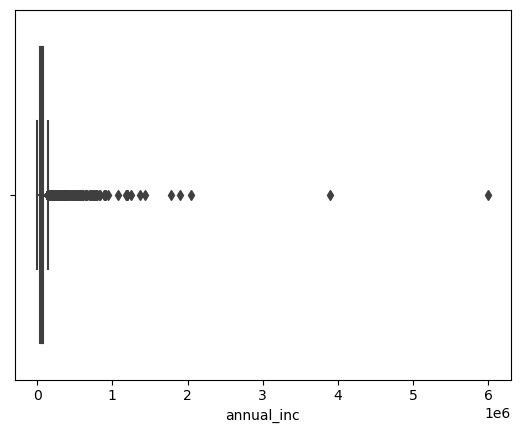

In [265]:
sns.boxplot(loans_data['annual_inc'])

# Observations: annual_inc has outliers present

In [266]:
quantile_info = loans_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

# Observations:
# The values after 95 percentile seems to be disconected from the general distribution and
# also there is huge increase in the value for small quantile variation.
# So we can consider threshold for removing outliers as 0.95

0.50     59000.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234000.0
Name: annual_inc, dtype: float64

In [267]:
as_per_95_annual_inc = loans_data['annual_inc'].quantile(0.95)
loans_data = loans_data[loans_data.annual_inc <= as_per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

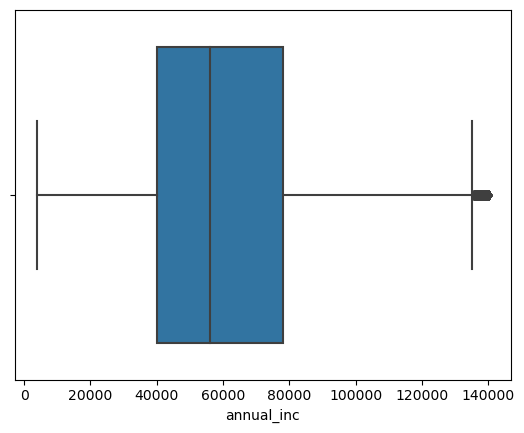

In [268]:
sns.boxplot(loans_data.annual_inc)


## Check/Remove Outlier for - dti

<AxesSubplot:xlabel='dti'>

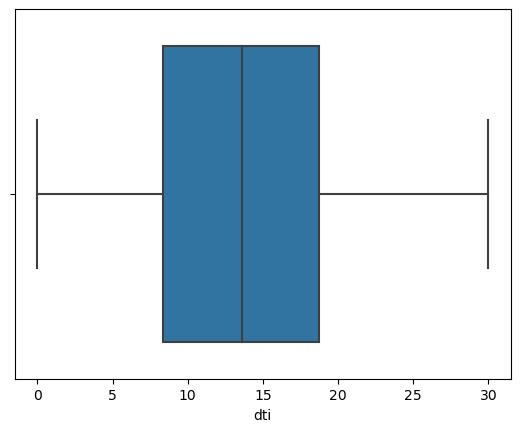

In [269]:
sns.boxplot(loans_data.dti)

# Observations: dti does not have any outliers

## Check/Remove Outlier for - loan_amnt

<AxesSubplot:xlabel='loan_amnt'>

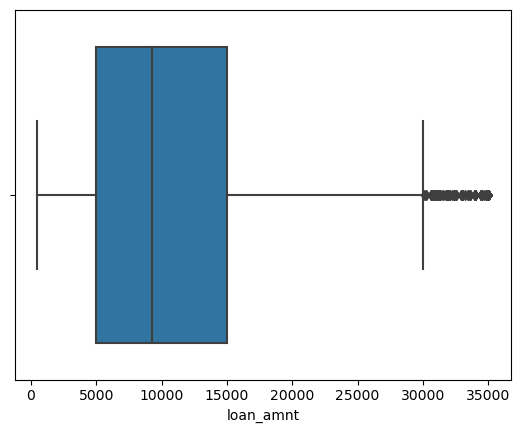

In [270]:
sns.boxplot(loans_data.loan_amnt)

In [271]:
loans_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

# Observations: Outlier does not seems to be present for loan_amnt

0.750    15000.0
0.900    20000.0
0.950    25000.0
0.970    25475.0
0.975    28000.0
0.980    30000.0
0.990    35000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

## Check/Remove Outlier for - funded_amnt

<AxesSubplot:xlabel='funded_amnt'>

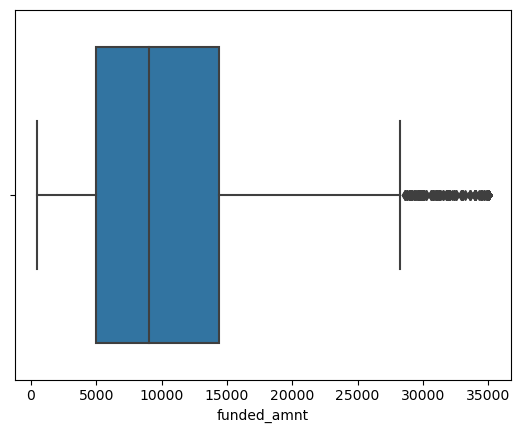

In [272]:
sns.boxplot(loans_data.funded_amnt)


In [273]:
loans_data.funded_amnt.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

# Observations:
# Though there are some values far from distribution, the distribution is pretty continue
# there is no need to remove outliers / extreme values for this column.

0.500     9000.0
0.750    14400.0
0.900    20000.0
0.950    25000.0
0.970    25000.0
0.975    26000.0
0.980    28100.0
0.985    30000.0
0.990    34000.0
1.000    35000.0
Name: funded_amnt, dtype: float64

# Univariate Analysis

### We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

<AxesSubplot:xlabel='loan_status', ylabel='count'>

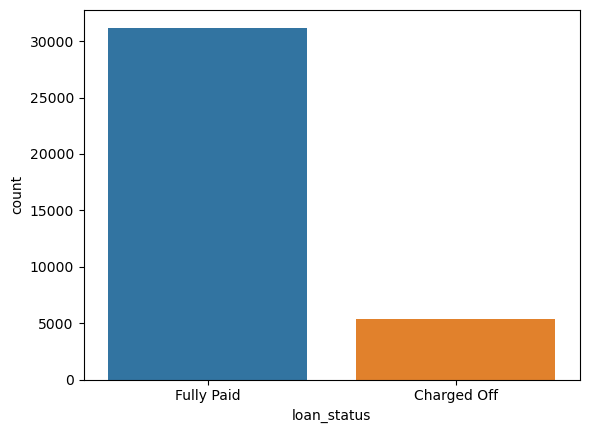

In [274]:
sns.countplot(x = 'loan_status', data = loans_data)

### Analyzing sub grade

<AxesSubplot:xlabel='grade', ylabel='count'>

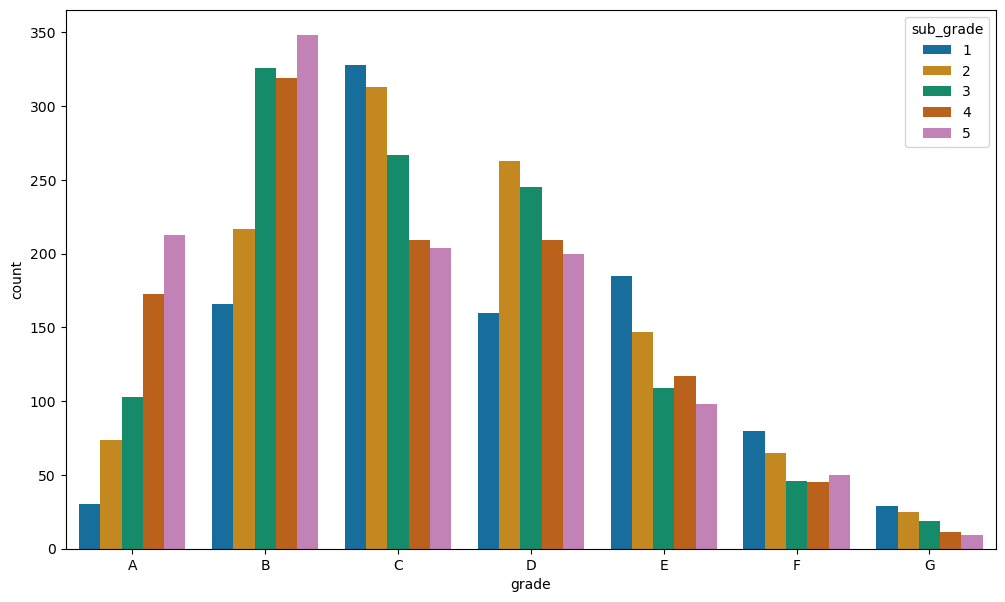

In [288]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loans_data[loans_data.loan_status == 'Charged Off'])

# Observation:
# There is a more probability of defaulting when sub grade is B5

### Analyzing grade

<AxesSubplot:xlabel='grade', ylabel='count'>

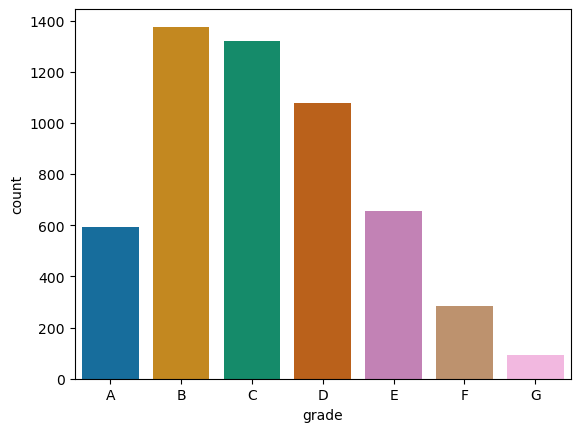

In [278]:
sns.countplot(x = 'grade', data = loans_data[loans_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

# Observation:
# There is a more probability of defaulting when grade is B

### Analyzing home_ownership

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

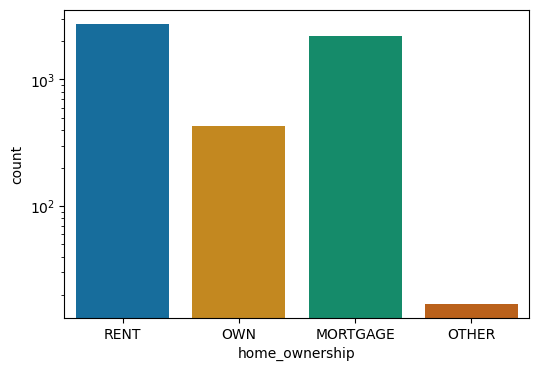

In [294]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loans_data[loans_data['loan_status']=='Charged Off'])

# Observation:
# There is a more probability of defaulting when applicants house_ownership is RENT

### Analyzing purpose

<AxesSubplot:xlabel='count', ylabel='purpose'>

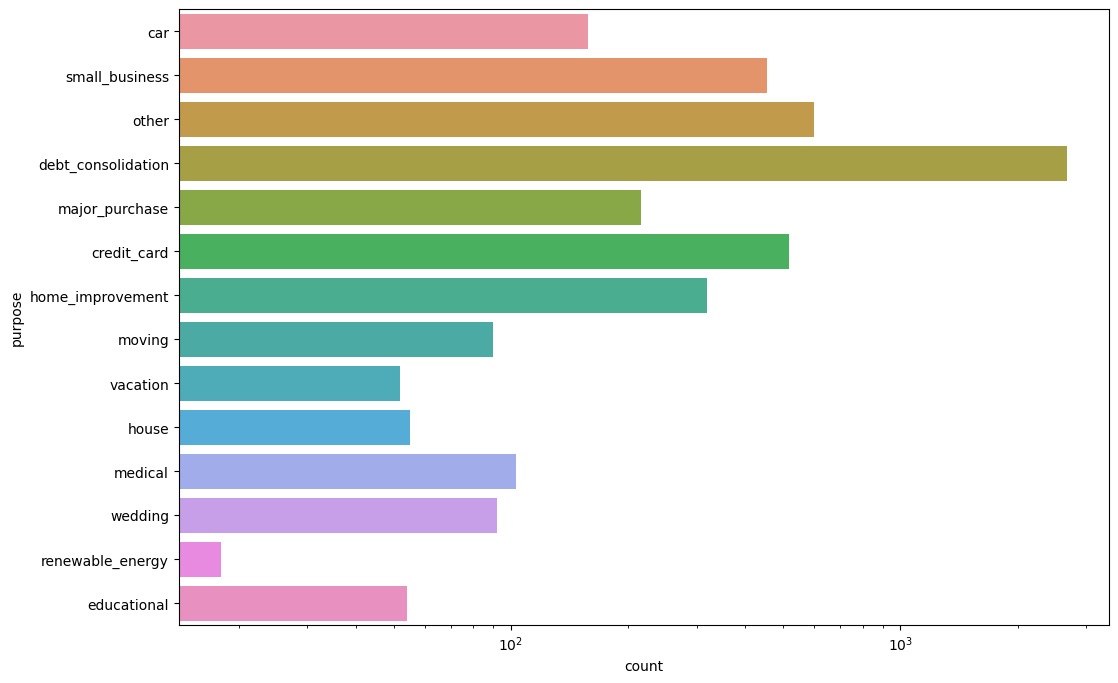

In [293]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loans_data[loans_data.loan_status == 'Charged Off'])

# Observation:
# There is a more probability of defaulting when applicants purose of loan is to clear debt

### Analyzing int_rate using new int_rate_group variable

Text(0.5, 0, 'Interest Rate')

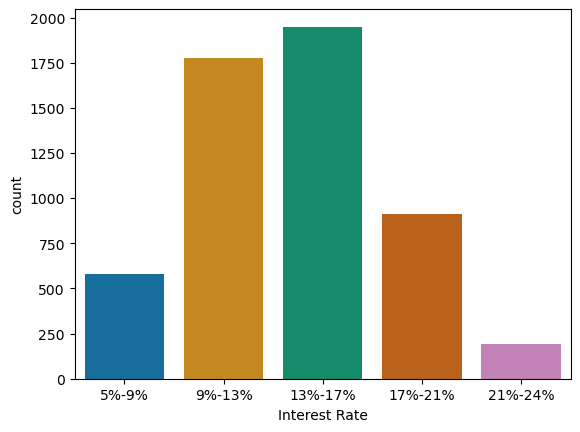

In [314]:
sns.countplot(x='int_rate_groups', data=loans_data[loans_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')

# Observation:
# There is a more probability of defaulting when applicant receive loan at interest rate between 13%-17%

### Analyzing emp_length

<AxesSubplot:xlabel='emp_length', ylabel='count'>

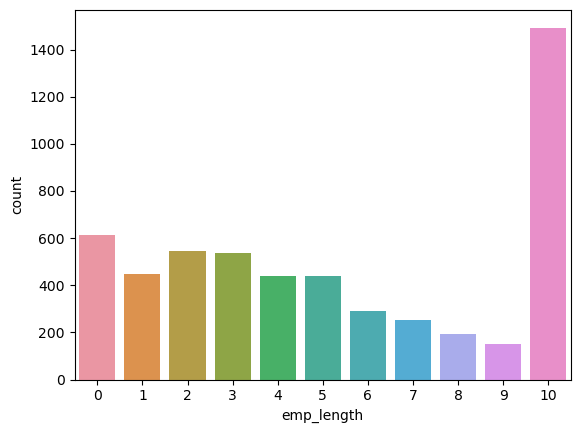

In [313]:
sns.countplot(x='emp_length', data=loans_data[loans_data.loan_status == 'Charged Off'])

# Observation:
# There is a more probability of defaulting when applicants employment length is more than 10 years

### Analyzing open_acc using new open_acc_groups variable

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

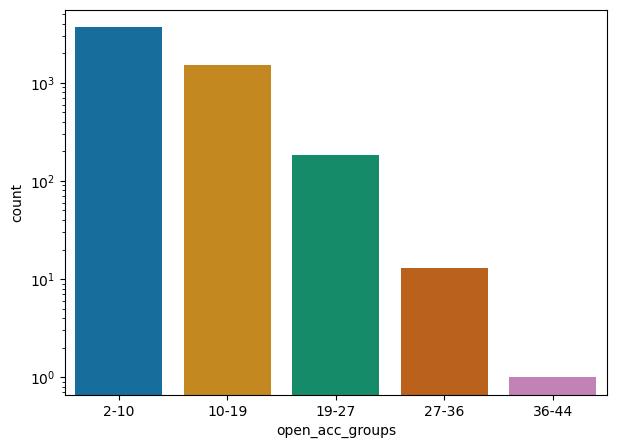

In [318]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loans_data[loans_data.loan_status == 'Charged Off'])

# Observations:
# Here we made y scale as logarithm to get more accurate analysis

# There is a more probability of defaulting when applicants have 2-10 open accounts

### Analyzing revol_util using new revol_util_groups variable

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

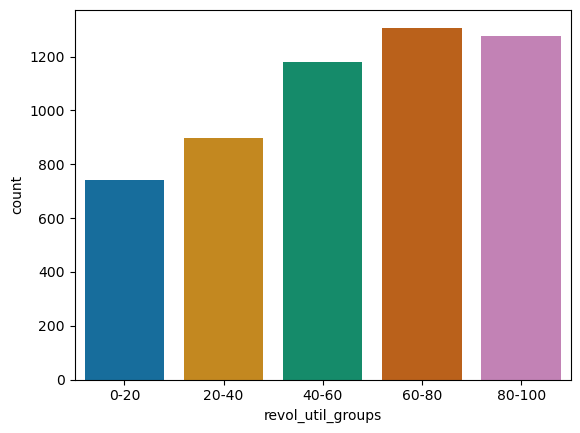

In [312]:
sns.countplot(x='revol_util_groups', data=loans_data[loans_data.loan_status == 'Charged Off'])

### Analyzing total_acc using new total_acc_groups variable

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

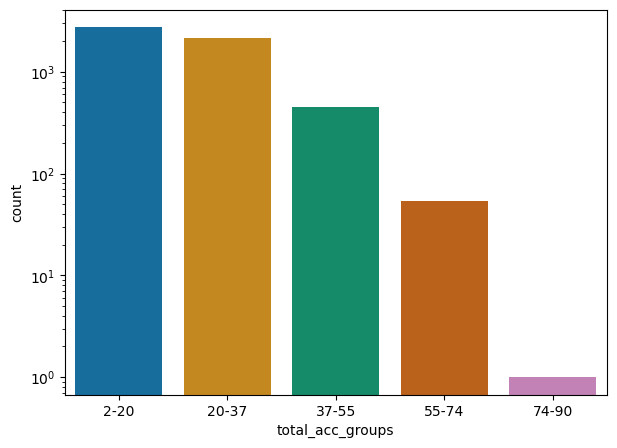

In [325]:
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loans_data[loans_data.loan_status == 'Charged Off'])

### Analyzing annual_inc using new annual_inc_groups variable

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

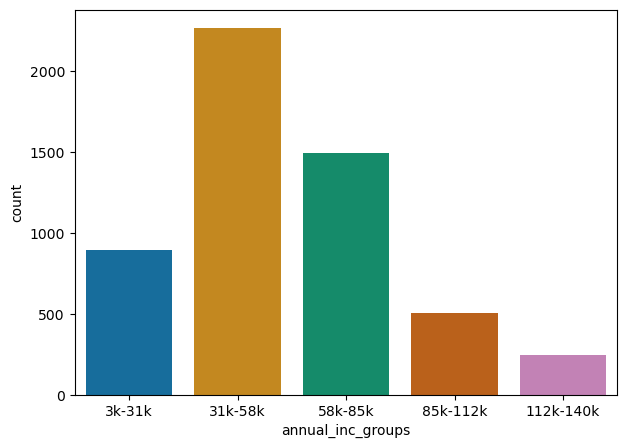

In [327]:
fig, ax = plt.subplots(figsize = (7,5))
sns.countplot(x='annual_inc_groups', data=loans_data[loans_data.loan_status == 'Charged Off'])

# Observation:
# There is a more probability of defaulting when applicants has an annual income range is between 31k - 58k

### Analyzing funded_amnt using new funded_amnt_group variable

<AxesSubplot:xlabel='funded_amnt_group', ylabel='count'>

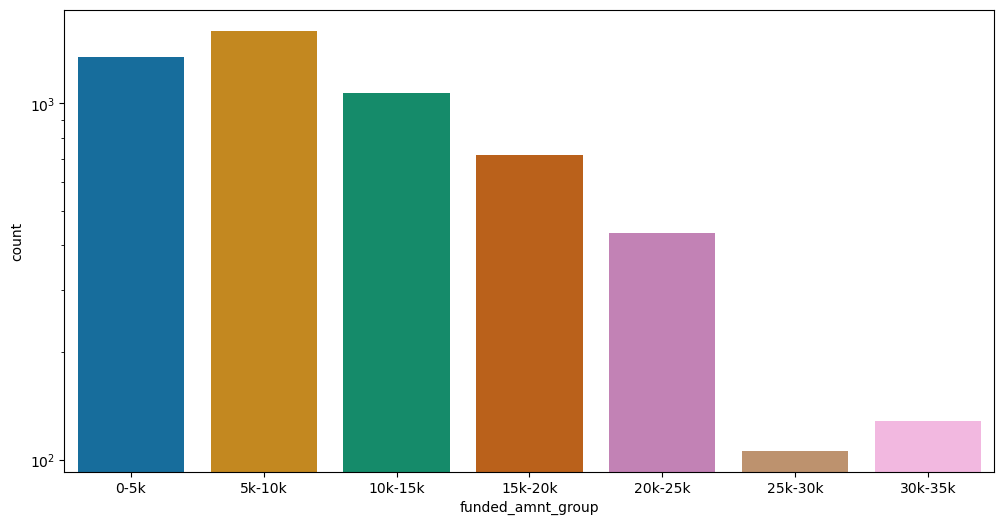

In [338]:
fig,ax = plt.subplots(figsize = (12,6))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_group', data=loans_data[loans_data['loan_status']=='Charged Off'])

# Observation:
# There is a more probability of defaulting when applicants funded amount is between 5k-10k

### Analyzing loan_amnt using new loan_amnt_groups variable

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

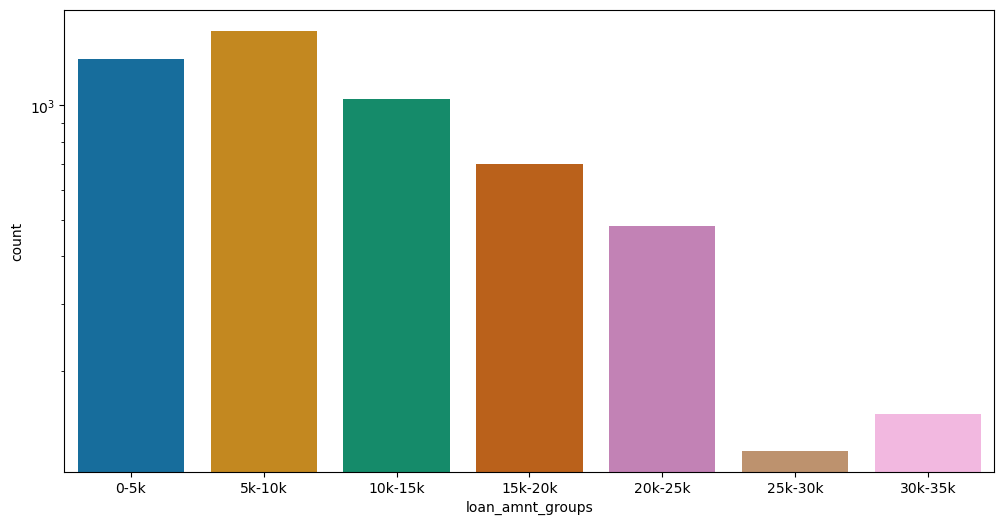

In [339]:
fig,ax = plt.subplots(figsize = (12,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loans_data[loans_data['loan_status']=='Charged Off'])

# Observation:
# There is a more probability of defaulting when applicants loan amount is between 5k-10k

### Analyzing dti using new dti_groups variable

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

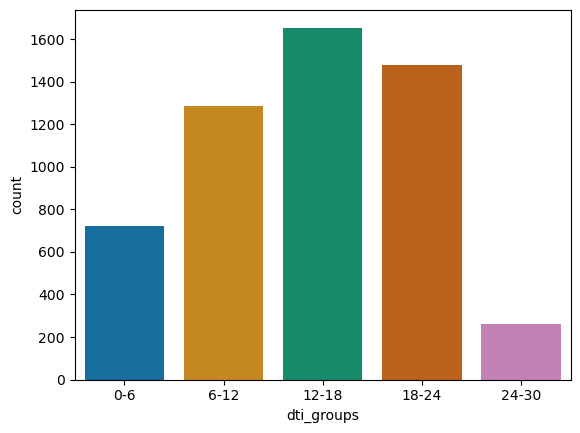

In [333]:
sns.countplot(x='dti_groups', data=loans_data[loans_data['loan_status']=='Charged Off'])

# Observation:
# There is a more probability of defaulting when applicants dti is between 12-18

### Analyzing installment using new installment_groups variable

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

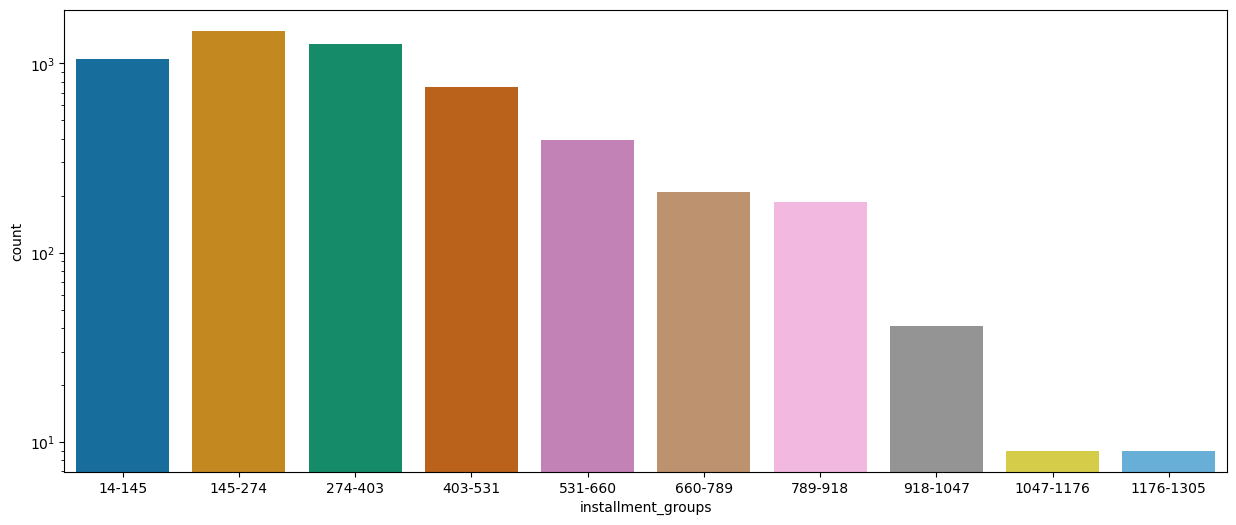

In [335]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loans_data[loans_data['loan_status']=='Charged Off'])

# Observation:
# There is a more probability of defaulting when applicants monthlt installemnts are between 145-274

### Analyzing by issued month and year

<AxesSubplot:xlabel='issue_year', ylabel='count'>

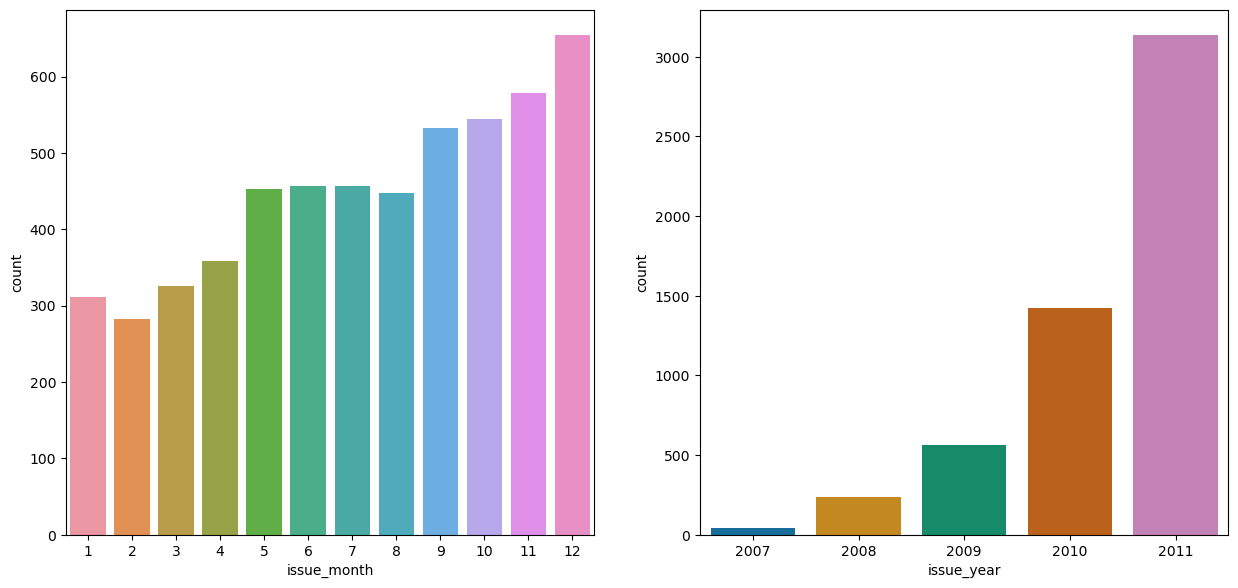

In [341]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loans_data[loans_data['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loans_data[loans_data['loan_status']=='Charged Off'])

# Observation:
# Maximum number of defaults occured,
# - when the loan was sanctioned/issued in Dec.
# - Loan issued in the year 2011 compared to other years

### Analyzing term

<AxesSubplot:xlabel='term', ylabel='count'>

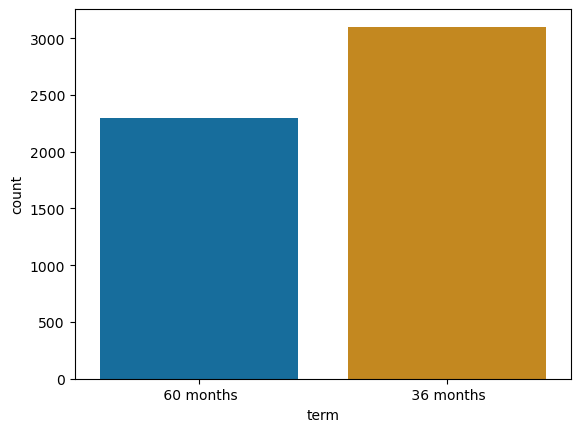

In [343]:
sns.countplot(x='term', data=loans_data[loans_data['loan_status']=='Charged Off'])

# Observation:
# There is a more probability of defaulting when applicants loan term is 36 months

### Analyzing verification status

<AxesSubplot:xlabel='verification_status', ylabel='count'>

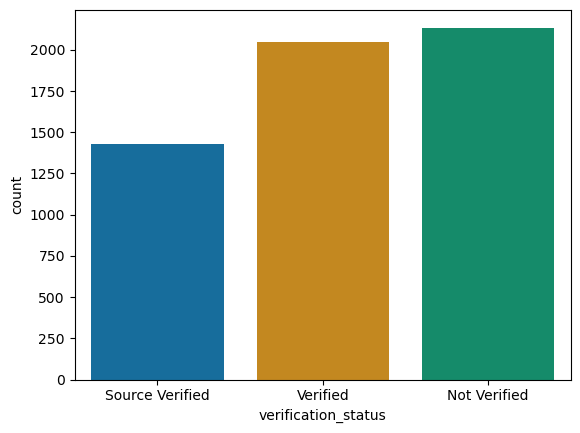

In [344]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])

# Observation:
# There is a more probability of defaulting when applicants loan verification status is not verified

### Analyzing inq_last_6mths

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

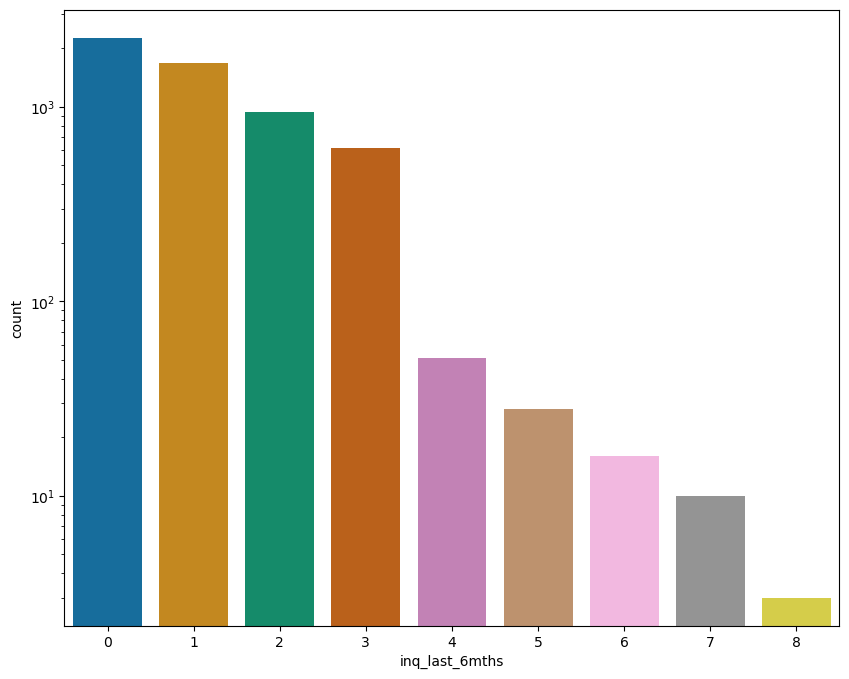

In [345]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

# Observation:
# There is a more probability of defaulting when applicants no of enquiries in last 6 months is 0

### Analyzing pub_rec

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

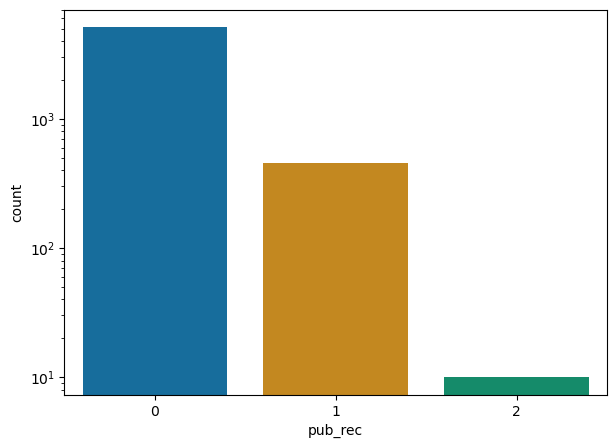

In [346]:
fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

# Observation:
# There is a more probability of defaulting when applicants public recors is 0

## Summary of Observations from Univariate Analysis

### The above analysis with respect to the charged off loans for each variable suggests the following. There is a more probability of defaulting when :

- Applicants having house_ownership as 'RENT'
- Applicants who use the loan to clear other debts
- Applicants who receive interest at the rate of 13-17%
- Applicants who have an income of range 31k - 58k
- Applicants who have 2-10 open_acc
- Applicants with employement length of 10
- When funded amount by investor is between 5k - 10k
- Loan amount is between 5k - 10k
- Dti is between 12-18
- When monthly installments are between 145-274
- Term of 36 months
- When the loan status is Not verified
- When the no of enquiries in last 6 months is 0
- When the number of public records is 0
- When Grade is B
- When sub grade is B5
- Last month of year
- In year 2011 due to global recession

# Bivariate Analysis

## Analysing loan_amnt with other columns

### Loan Amount vs Loan Purpose

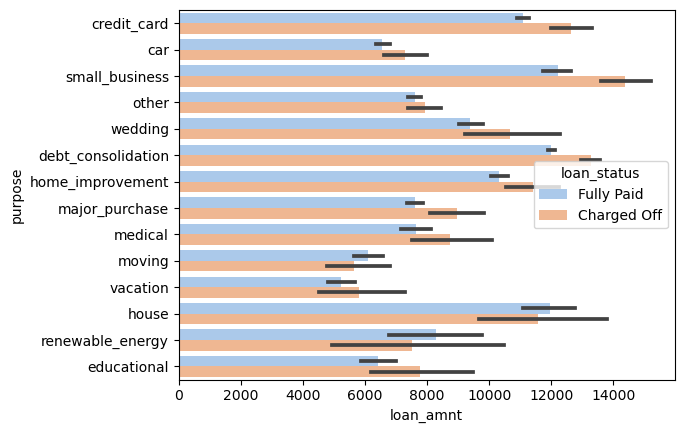

In [360]:
sns.barplot(data =loans_data,x='loan_amnt', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

# Observation:
# There is a more probability of defaulting when applicants taken a loan for small business
# and the loan amount is greater than 14k

### Loan Amount vs Interest Rate

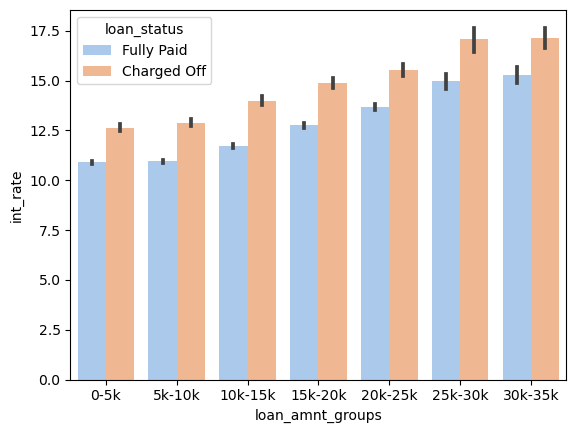

In [359]:
sns.barplot(data =loans_data,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

# Observation:
# There is a more probability of defaulting when applicants taken a loan in the range 30k - 35k
# and charged interest rate between 15-17 %

<Figure size 640x480 with 0 Axes>

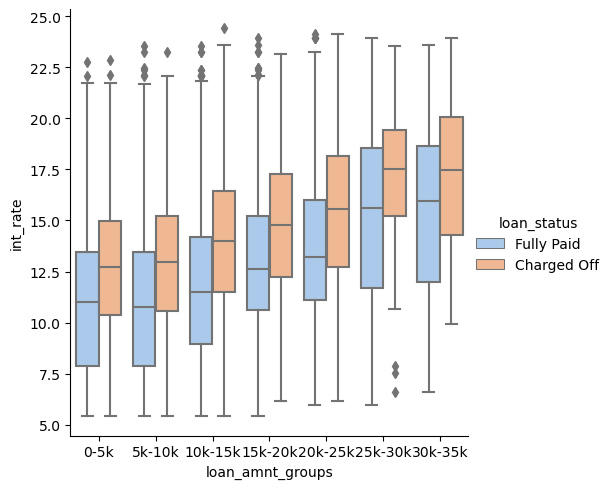

In [374]:
plt.tight_layout()
sns.catplot(data =loans_data,y ='int_rate', x ='loan_amnt_groups', hue ='loan_status',palette="pastel",kind = 'box')

# Observation:
# There is a more probability of defaulting when interest rate for charged off loans is pretty high
# than that of fully paid loans in all the loan_amount groups

### Loan Amount vs House ownership

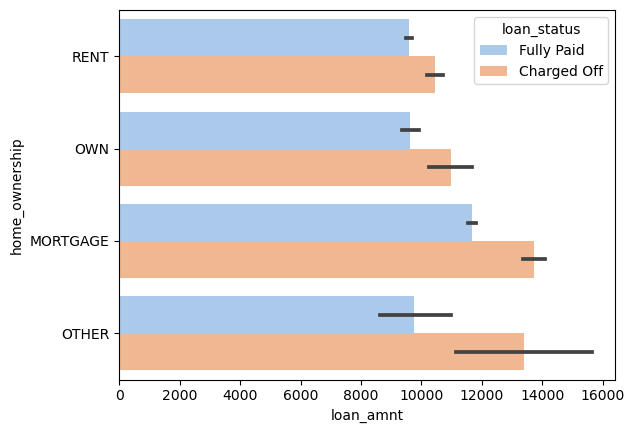

In [358]:
sns.barplot(data =loans_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

# Observation:
# There is a more probability of defaulting when applicants whose home ownership is MORTGAGE 
# and taken a loan of 14-16k

### Loan Amount vs Issue month

<AxesSubplot:xlabel='issue_month', ylabel='loan_amnt'>

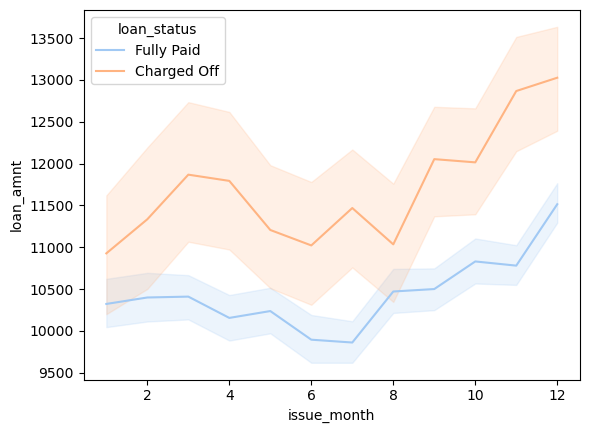

In [354]:
sns.lineplot(data =loans_data,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")

# Observation:
# There is a more probability of defaulting when loan issue month is december and loan amount is between 12k - 13.5k

### Loan Amount vs Grade

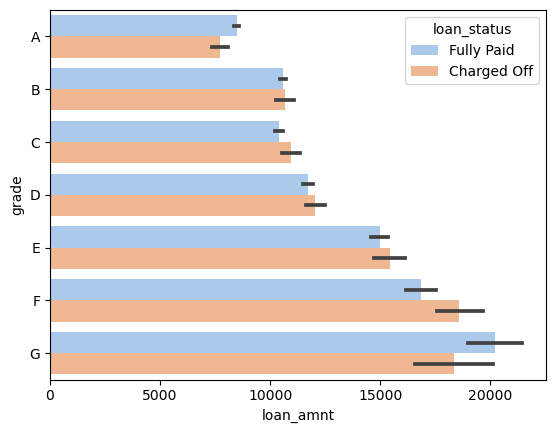

In [357]:
sns.barplot(data =loans_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

# Observation:
# There is a more probability of defaulting when grade is F and loan amount is between 17k-20k


### Loan Amount vs Emp length

<AxesSubplot:xlabel='emp_length', ylabel='loan_amnt'>

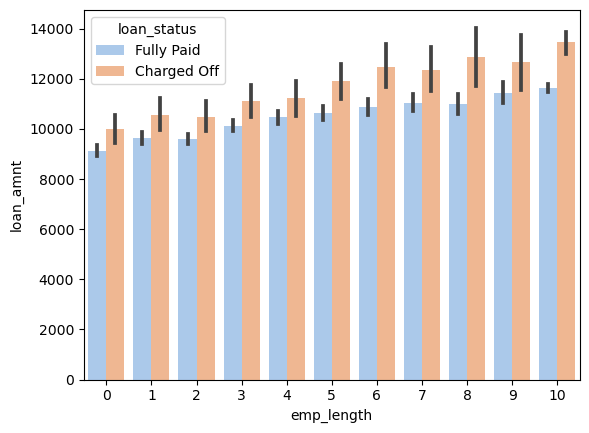

In [361]:
sns.barplot(data =loans_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")

# Observation:
# There is a more probability of defaulting when employment length is 10yrs and loan amount is 12k-14k

### Loan Amount vs Verification Status

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

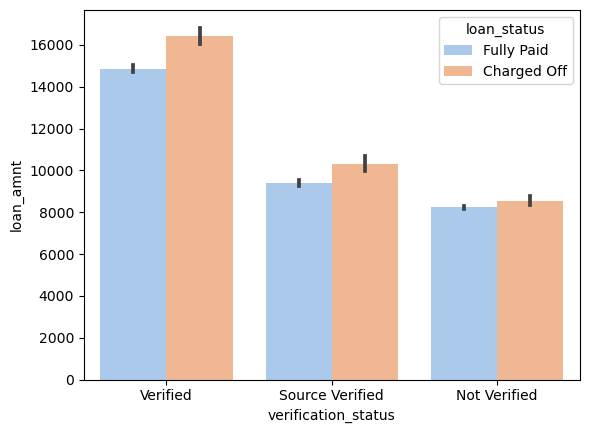

In [362]:
sns.barplot(data =loans_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")

# Observation:
# - Looking at the verification status data, verified loan applications tend to have higher loan amount.
# Which might indicate that the firms are first verifying the loans with higher values.
# - Also, There is a more probability of defaulting when the loan is verified and loan amount is above 16k


## Analysing Annual Income with other columns

### Annual Income vs Loan purpose

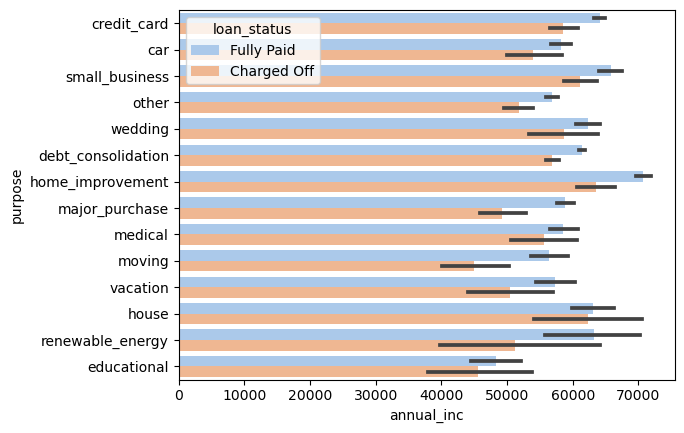

In [364]:
sns.barplot(data =loans_data,x='annual_inc', y='purpose', hue ='loan_status',palette="pastel")
plt.show()

# Observation:
# There is a more probability of defaulting when applicants taking loan for  home improvement
# and have income of 60k -65k

### Annual Income vs Home ownership

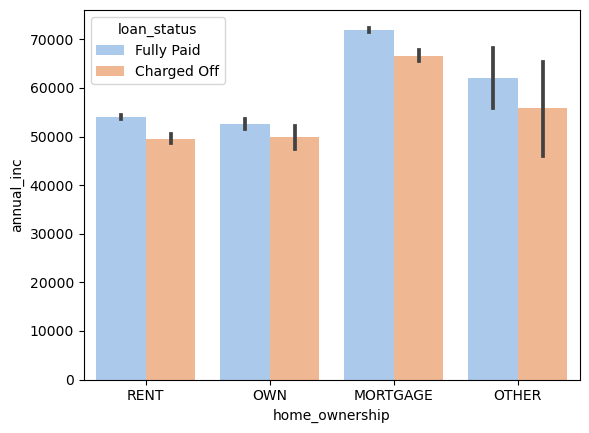

In [365]:
sns.barplot(data =loans_data,x='home_ownership', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

# Observation:
# There is a more probability of defaulting when applicants whose home ownership is MORTGAGE
# and have income of 63-68k

### Annual Income vs Loan amount

<AxesSubplot:xlabel='annual_inc_groups', ylabel='loan_amnt'>

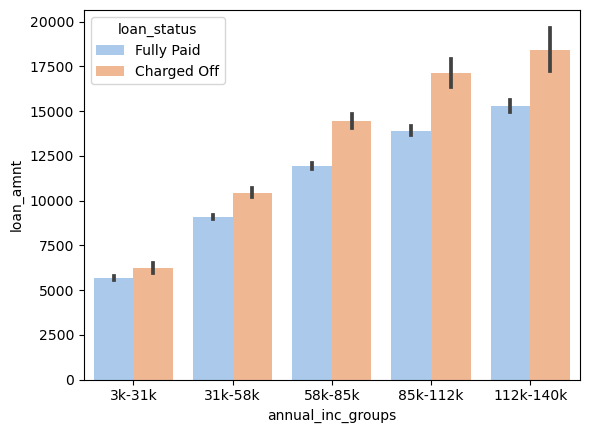

In [368]:
sns.barplot( data = loans_data, x='annual_inc_groups', y='loan_amnt', hue='loan_status',palette="pastel")


# Observation:
# There is a more probability of defaulting when applicants annual income is between 112k-140k 
# and loan amount is between 16k-20k

### Annual Income vs Interest Rate

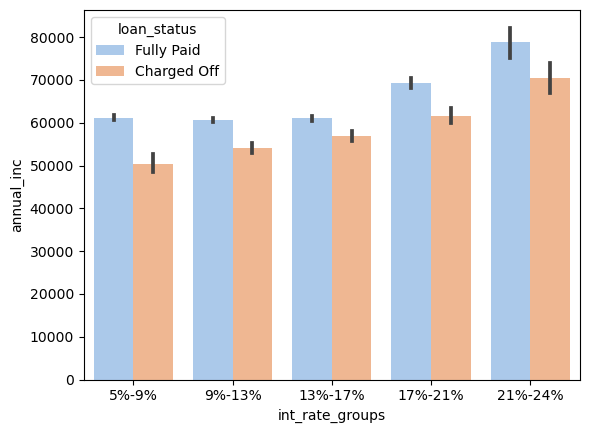

In [369]:
sns.barplot(data =loans_data,x='int_rate_groups', y='annual_inc', hue ='loan_status',palette="pastel")
plt.show()

# Observation:
# There is a more probability of defaulting when applicants who receive interest at the rate of 21-24% 
# and have an income of 65k-72k

## Analysing Grade with other columns

### Grade vs Interest Rate

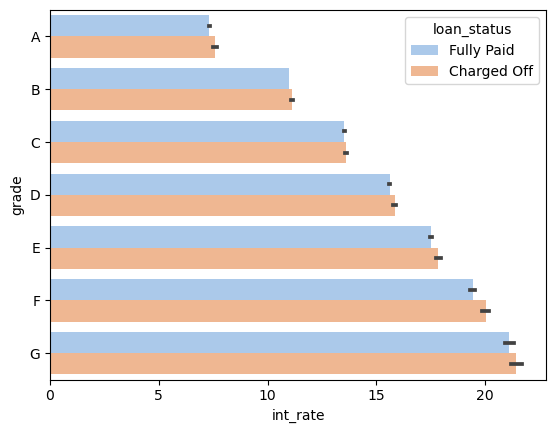

In [370]:
sns.barplot(data =loans_data,x='int_rate', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

# Observation:
# There is a more probability of defaulting when grade is G and interest rate above 20%

# Multivariate Analysis

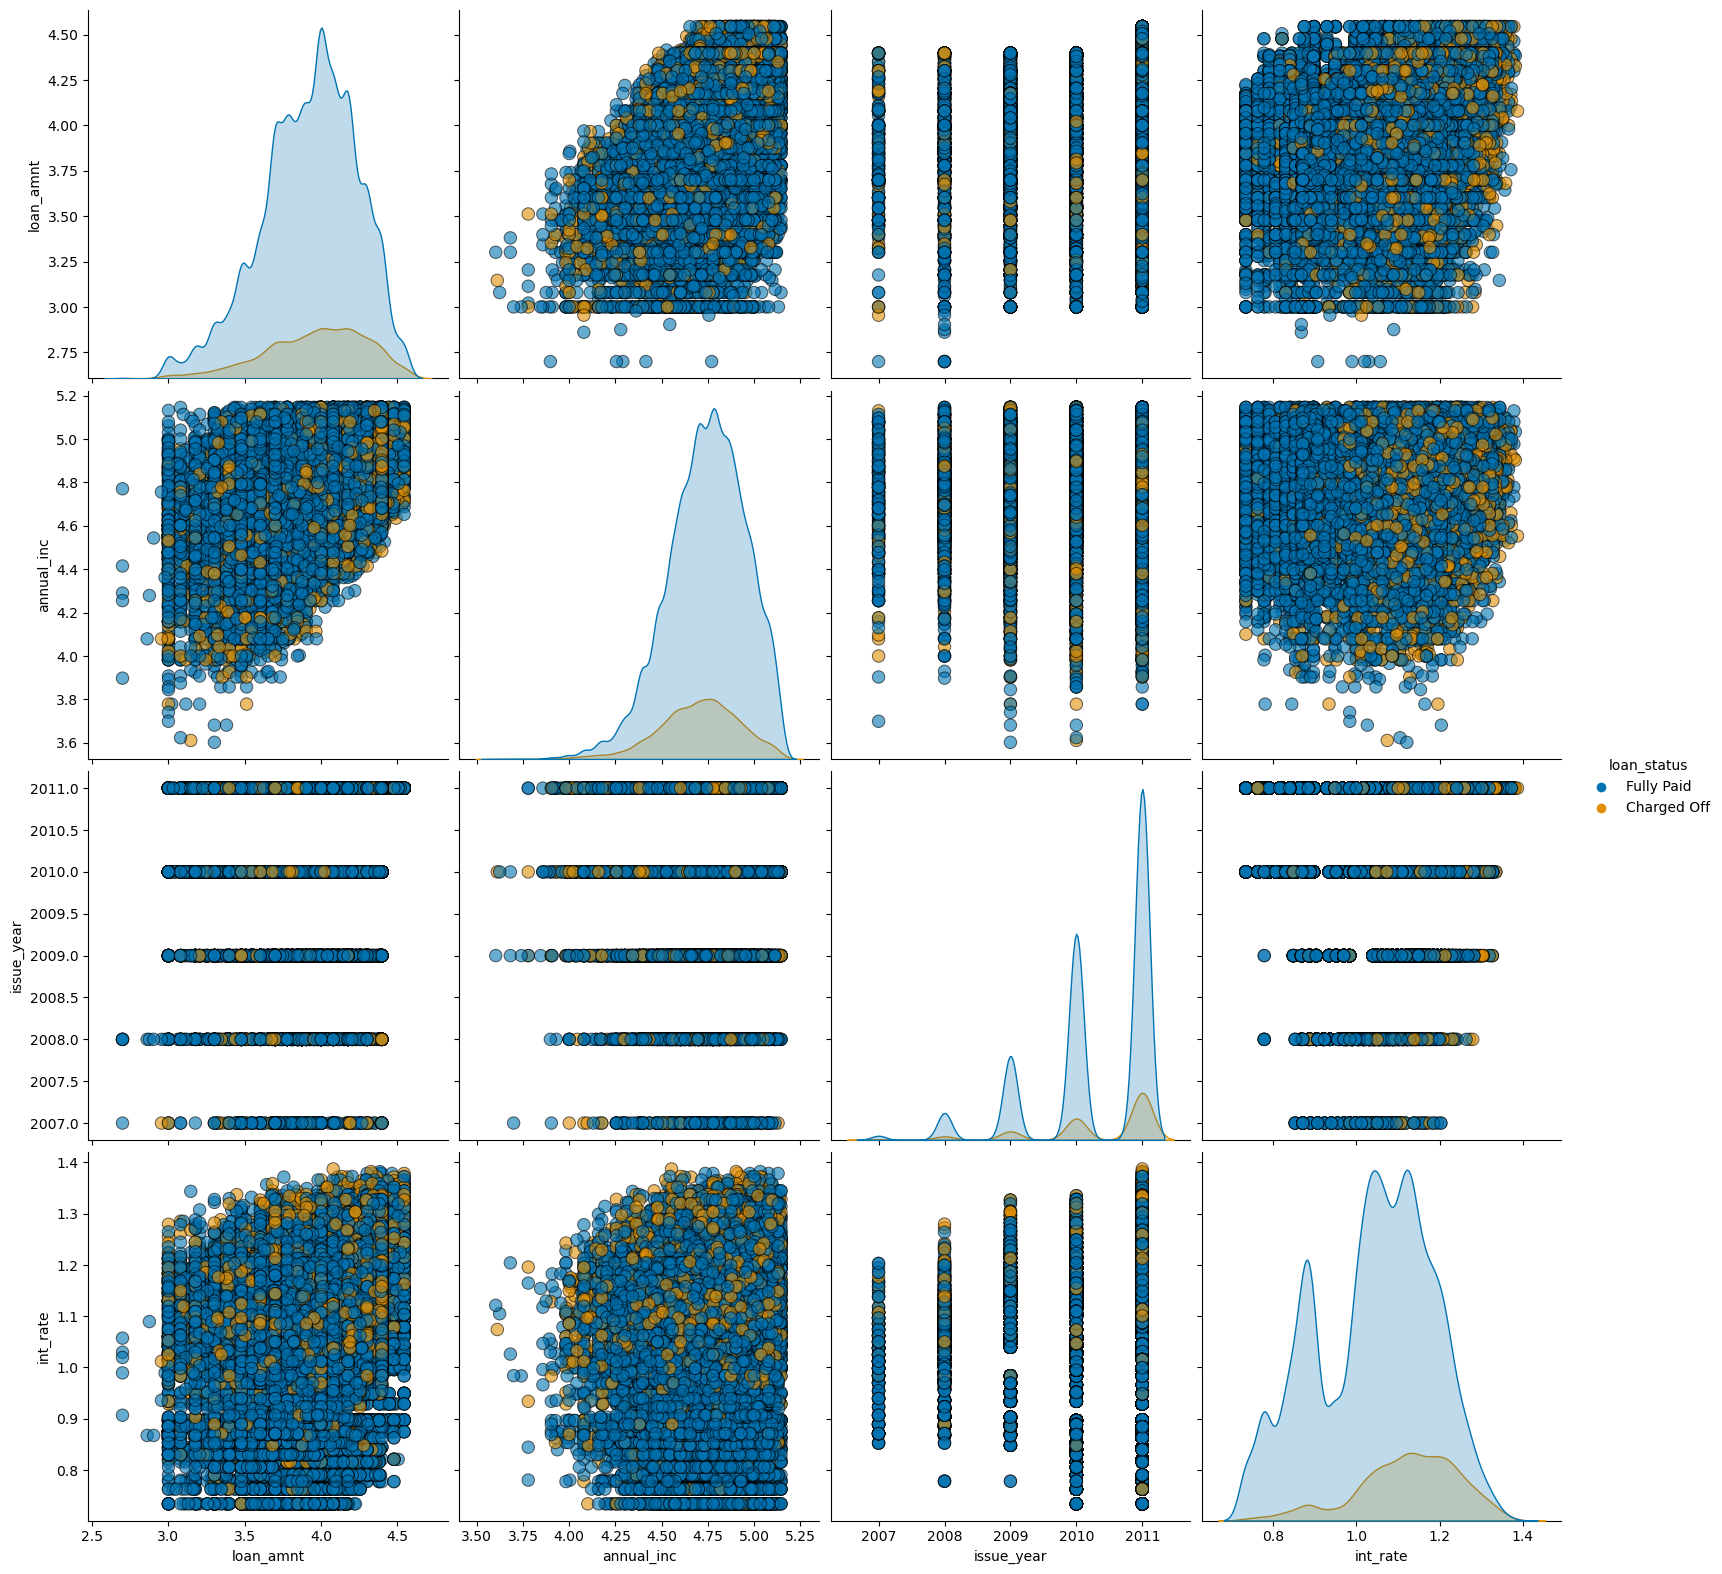

In [375]:
loan_pair = loans_data[['loan_amnt', 'annual_inc', 'issue_year','int_rate','loan_status']].copy()
loan_pair.head()

# Take the log of below variables as they are heavily skewed
loan_pair['loan_amnt'] = np.log10(loan_pair['loan_amnt'])
loan_pair['annual_inc'] = np.log10(loan_pair['annual_inc'])
loan_pair['int_rate'] = np.log10(loan_pair['int_rate'])

sns.pairplot(loan_pair, hue = 'loan_status', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4)
plt.show()

# Observation:
# - Higher the intrest rate higher charged off ratio
# - Higher the annual income higher the loan amount slightly.
# - Increase in number of charged off with increase in year.
# - Intrest rate is increasing with loan amount increase

# Final Observations:

## There is a more probability of defaulting when:

- Applicants taken a loan for small business and the loan amount is greater than 14k
- Applicants taken a loan in the range 30k - 35k and charged interest rate between 15-17 %
- Interest rate for charged off loans is pretty high than that of fully paid loans in all the loan_amount groups
- Applicants whose home ownership is MORTGAGE and taken a loan of 14-16k
- Loan issue month is december and loan amount is between 12k - 13.5k
- Grade is F and loan amount is between 17k-20k
- Employment length is 10yrs and loan amount is 12k-14k
- Loan is verified and loan amount is above 16k
- Applicants taking loan for  home improvement and have income of 60k-65k
- Applicants whose home ownership is MORTGAGE and have income of 63-68k
- Applicants annual income is between 112k-140k and loan amount is between 16k-20k
- Applicants who receive interest at the rate of 21-24% and have an income of 65k-72k
- Grade is G and interest rate above 20%